## Übung Machine Learning 1: Gradientenabstieg



--------------
### Einleitung
In den folgenden Aufgaben werden wir die Funktion $$y = (x+2)^2$$ verwenden. Gesucht ist das globale Minimum der Funktion.

------------------
### Aufgabe 1 - Analytische Lösung (1 Punkt)
Das globale Minimum lässt sich einfach analytisch berechnen, indem wir die Funktion ableiten und auf 0 setzen. Führen Sie diese Berechnung durch. 

f(x) = (x + 2)^2<br>
f'(x) = 2(x+2)^1 = 2x + 4<br>
<br>
2x + 4 = 0    |-4<br>
2x = -4       |:2<br>
x = -2

------------
### Aufgabe 2 - Lösung mittels Gradientenabstieg (6 Punkte)
Alternativ hätten wir auch den Gradientenabstieg verwenden können, um die Lösung zu finden. Führen Sie zunächst von Hand (d.h. ohne es zu implementieren) den Gradientenabstieg durch. Machen Sie Ihren Rechenweg deutlich. Initialisieren Sie x mit 3 und verwenden Sie als Lernrate 0.02. Es reicht, wenn Sie die ersten drei Iterationsschritte durchführen. 

x=3    Lernrate=0,002 <br>
<br>
    3 - 0,02\*(2\*  3   +4) = 2,8 <br>
  2,8 - 0,02\*(2\* 2,8  +4) = 2,608 <br>
2,608 - 0,02\*(2\*2,608 +4) = 2,42368

-----------------------------------------

### Aufgabe 3 - Implementierung in Python (6 Punkte)
Vermutlich konnten Sie in Aufgabe 2 bereits beobachten, wie wir uns mittels des Gradientenabstiegsverfahrens langsam in Richtung des gesuchten Wertes bewegen konnten. Es hätte allerdings noch eine ganze Reihe weiterer Iterationen benötigt, um dort anzukommen. Implementieren Sie eine Funktion für den Gradientenabstieg in Python. Die Verfeinerung soll abgebrochen werden, wenn die Änderung zwischen zwei aufeinander folgenden Durchläufen kleiner als ein vorgegebener Schwellwert ist und wenn eine maximale Anzahl Iterationen erreicht ist. Die Funktion soll eine Liste des Fehlerwertes in den einzelnen Iterationsschritten, sowie als zweiten Rückgabewert den gefundenen Wert zurückgeben.

Rufen Sie die Funktion anschließend mit folgenden Parametereinstellungen auf: 
* Initialer Wert für x = 3
* Lernrate $\alpha$= 0.02
* Schwellwert Abbruch = 0.00001
* Maximale Anzahl Iterationen = 1000 

Geben Sie den gefundenen Wert für x aus.

In [1]:
startwert = 3
limit = 1000
a = 0.02

def gradient_descend(startwert, limit, a):  
    value = startwert
    for i in range(limit):
        if value >= -2 and value <= -1.99999:
            print("Value is too small! Approximation is finish!")
            break
        value = value - 0.02 * (2*value + 4)
        #print(value)
    return value

gradient_descend(startwert, limit, a)

Value is too small! Approximation is finish!


-1.9999902207163505

--------------------
### Aufgabe 4 - Plotten der Lernkurve (2 Punkte)

Plotten Sie die Lernkurve (d.h. die Entwicklung des Fehlers über die einzelnen Iterationsschritte hinweg)

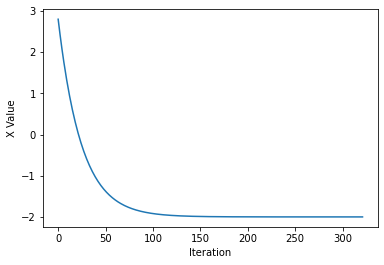

In [2]:
import matplotlib.pyplot as plt

startwert = 3
limit = 1000
a = 0.02

result = []

value = startwert
for i in range(limit):
    if value >= -2 and value <= -1.99999:
        break
    value = value - a * (2*value + 4)
    result += [value]
    
plt.plot(result)
plt.ylabel('X Value')
plt.xlabel('Iteration')
plt.show()

------------
### Aufgabe 5 - Experimente mit der Lernrate (3 Punkte)

Rufen Sie Ihre Gradientenabstiegs-Funktion erneut auf, allerdings mit den unten genannten, veränderten Parametereinstelllungen. Plotten Sie anschließend in beiden Fällen erneut die Lernkurve. Was beobachten Sie? Erklären Sie, wie die beobachteten Effekte zustande kommen. 

Neue Parameter:  
a) Lernrate = 0.8 (die anderen Parameter bleiben gleich)  
b) Lernrate = 1.05 und maximale Anzahl Iterationen = 30 (die anderen Parameter bleiben gleich)  

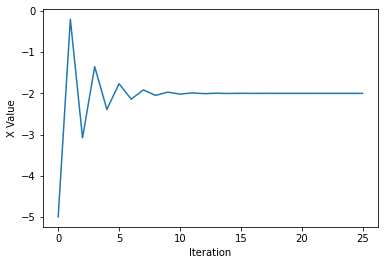

In [3]:
# Code für Aufruf mit Lernrate = 0.8 hier
startwert = 3
limit = 1000
a = 0.8

result = []

value = startwert
for i in range(limit):
    if value >= -2 and value <= -1.99999:
        break
    value = value - a * (2*value + 4)
    result += [value]
    
plt.plot(result)
plt.ylabel('X Value')
plt.xlabel('Iteration')
plt.show()

**Erklärung a):**  
Zwar springt der Algorithmus immer über sein Ziel hinaus und ändert seinen Wert zu sehr in die eigentlich richtige Richtung. Jedoch kommt er dennoch dem Zielwert näher und dieLernrate ist damit nicht zu groß gewählt worden.

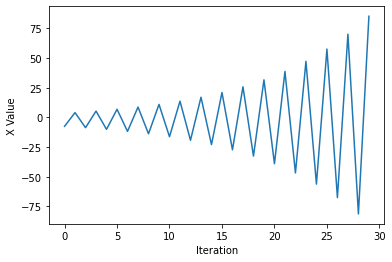

In [4]:
# Code für Aufruf mit Lernrate = 1.05 hier
startwert = 3
limit = 30
a = 1.05

result = []

value = startwert
for i in range(limit):
    if value >= -2 and value <= -1.99999:
        break
    value = value - a * (2*value + 4)
    #print(value)
    result += [value]
    
plt.plot(result)
plt.ylabel('X Value')
plt.xlabel('Iteration')
plt.show()

**Erklärung b):**  
Hier wurde nun die Lernrate zu groß gewählt. Der Algorithmus will seinen Wert zur 0 bewegen, aber aktualisiert ihn zu sehr. Damit schießt er wie bei a) am Zielwert vorbei. Der große Unterschied ist nun, dass er dem Ziel nun weiter entfernt ist als zuvor (anders als bei a). Und nun kommt es zu einem Teufelskreislauf oder besser: einem Aufwicklungseffekt. Denn nun merkt er, dass er noch weiter vom Ziel entfernt ist und bewegt sich noch intensiver in die entgegengesetzte Richtung (in der er hergekommen ist). Danach ist er dem Zielwert noch weiter entfernt und so geht es weiter...

-------------------------
### Aufgabe 6 - Verwendung einer Lernrate mit Gewichtsabfall (2 Punkte)

Erweitern Sie Ihren Code durch eine Lernrate mit Gewichtsabfall. Verwenden Sie dafür die in der Vorlesung vorgestellte Formel für den Gewichtsabfall (Weight decay formula, Folie 82 im Kapitel Linear Regression). 
Rufen Sie die Funktion anschließend mit den Parametern aus Aufgabe 5b sowie $c=5$ auf. 

Plotten Sie anschließend erneut die Lernkurve. Was beobachten Sie? 

Achtung: Bitte führen Sie die Änderungen nicht im Code von Aufgabe 3 durch, sondern kopieren Sie Ihren Code zunächst in die unten stehende Codezelle und führen Sie die Veränderung dort durch. 

Value is too small! Approximation is finish!


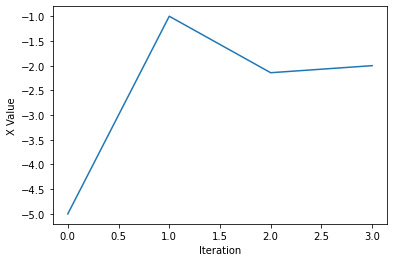

In [5]:
startwert = 3
limit = 1000
a0 = 0.8
c = 5

result = []

value = startwert
for i in range(limit):
    if value >= -2 and value <= -1.99999:
        print("Value is too small! Approximation is finish!")
        break
    alpha = a0 * ((c) / (c+i))
    value = value - alpha * (2*value + 4)
    result += [value]

plt.plot(result)
plt.ylabel('X Value')
plt.xlabel('Iteration')
plt.show()

Nun noch ein paar empirische Untersuchungen:

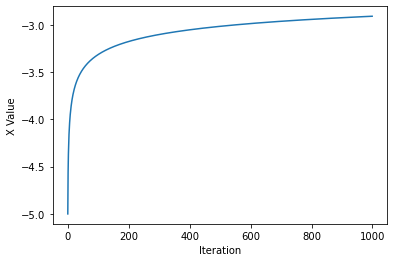

With c= 0.1 
--------------------------------------------------------------------------------------



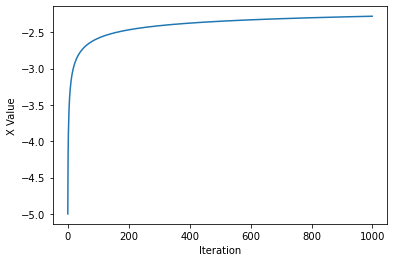

With c= 0.2 
--------------------------------------------------------------------------------------



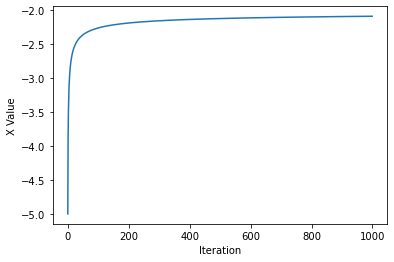

With c= 0.30000000000000004 
--------------------------------------------------------------------------------------



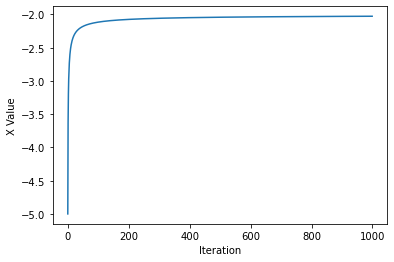

With c= 0.4 
--------------------------------------------------------------------------------------



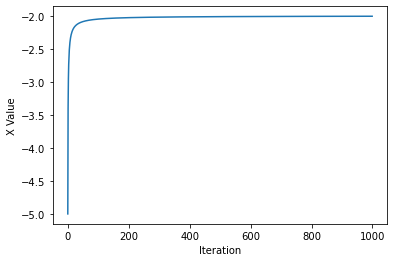

With c= 0.5 
--------------------------------------------------------------------------------------



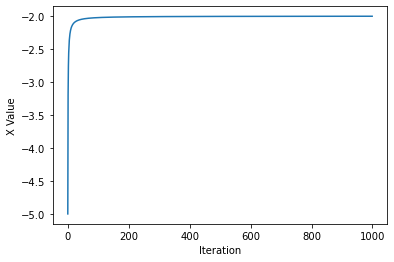

With c= 0.6000000000000001 
--------------------------------------------------------------------------------------



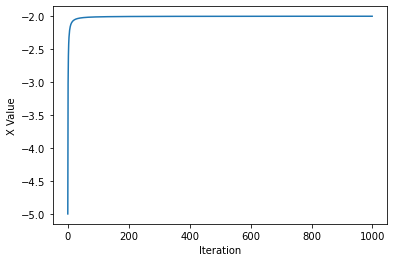

With c= 0.7000000000000001 
--------------------------------------------------------------------------------------



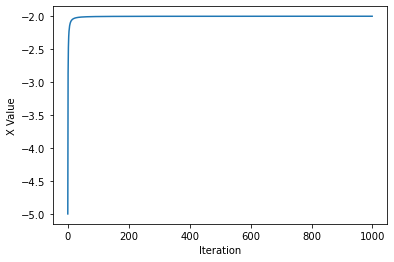

With c= 0.8 
--------------------------------------------------------------------------------------



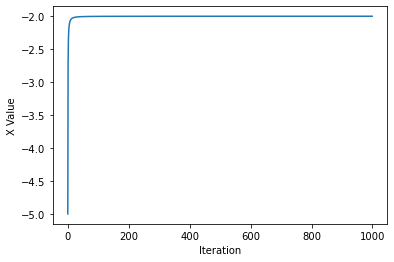

With c= 0.9 
--------------------------------------------------------------------------------------



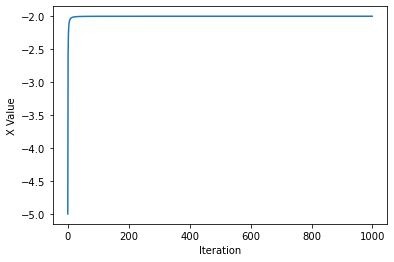

With c= 1 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


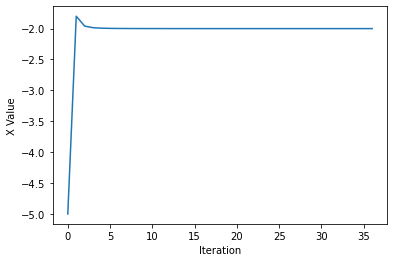

With c= 2 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


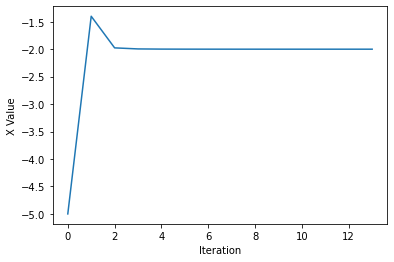

With c= 3 
--------------------------------------------------------------------------------------



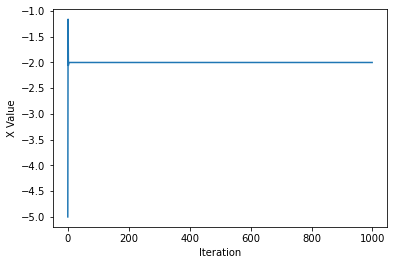

With c= 4 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


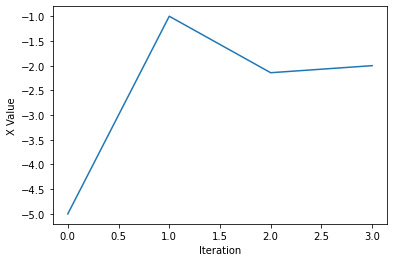

With c= 5 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


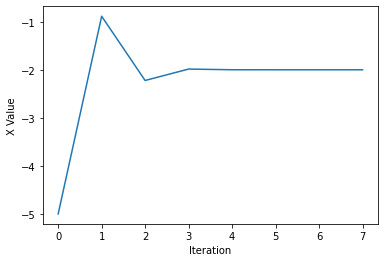

With c= 6 
--------------------------------------------------------------------------------------



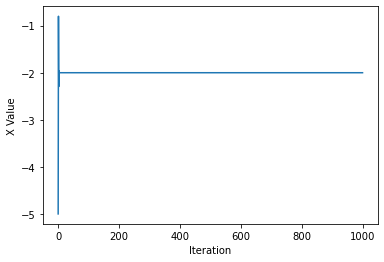

With c= 7 
--------------------------------------------------------------------------------------



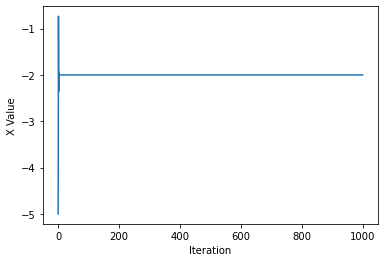

With c= 8 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


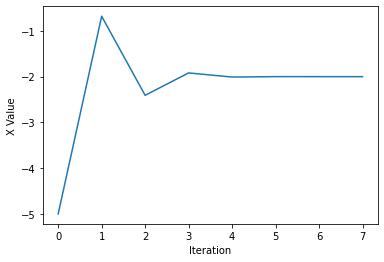

With c= 9 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


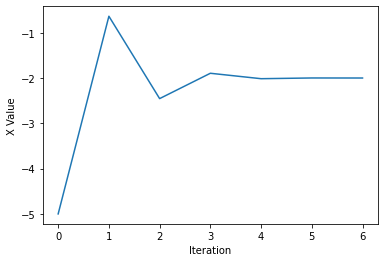

With c= 10 
--------------------------------------------------------------------------------------



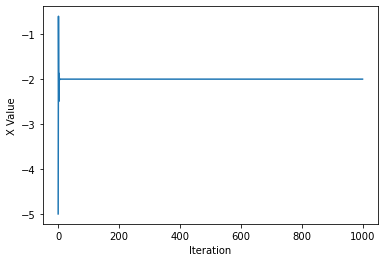

With c= 11 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


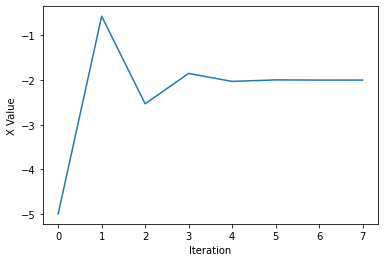

With c= 12 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


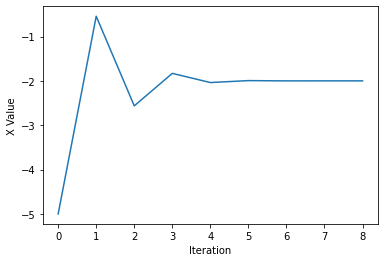

With c= 13 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


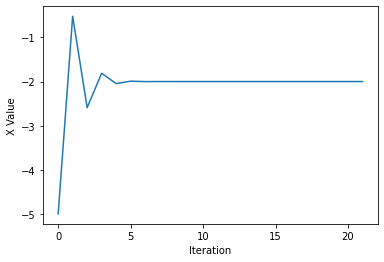

With c= 14 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


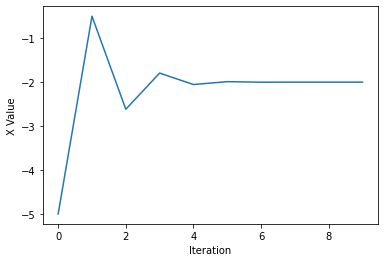

With c= 15 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


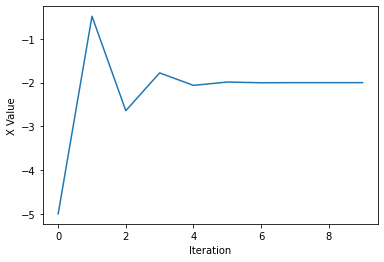

With c= 16 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


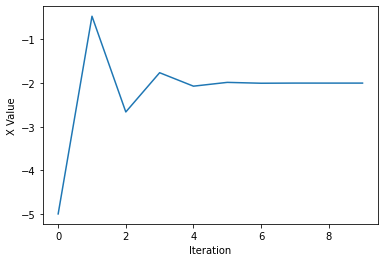

With c= 17 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


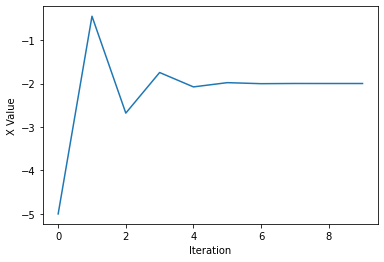

With c= 18 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


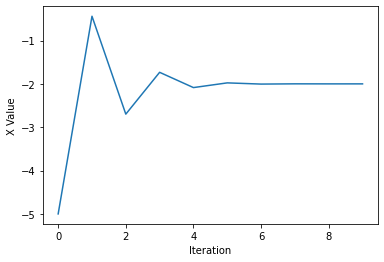

With c= 19 
--------------------------------------------------------------------------------------



In [6]:
for z in range(1, 10):
    z = z*0.1
    
    startwert = 3
    limit = 1000
    a0 = 0.8
    c = z

    result = []

    value = startwert
    for i in range(limit):
        if value >= -2 and value <= -1.99999:
            print("Value is too small! Approximation is finish!")
            break
        alpha = a0 * ((c) / (c+i))
        value = value - alpha * (2*value + 4)
        result += [value]

    plt.plot(result)
    plt.ylabel('X Value')
    plt.xlabel('Iteration')
    plt.show()
    print("With c=", z, "\n--------------------------------------------------------------------------------------\n")
    
for z in range(1,20):
    startwert = 3
    limit = 1000
    a0 = 0.8
    c = z

    result = []

    value = startwert
    for i in range(limit):
        if value >= -2 and value <= -1.99999:
            print("Value is too small! Approximation is finish!")
            break
        alpha = a0 * ((c) / (c+i))
        value = value - alpha * (2*value + 4)
        result += [value]

    plt.plot(result)
    plt.ylabel('X Value')
    plt.xlabel('Iteration')
    plt.show()
    print("With c=", z, "\n--------------------------------------------------------------------------------------\n")

Value is too small! Approximation is finish!


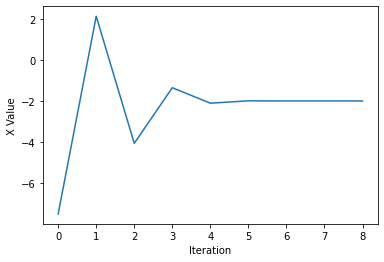

In [7]:
startwert = 3
limit = 30
a0 = 1.05
c = 5

result = []

value = startwert
for i in range(limit):
    if value >= -2 and value <= -1.99999:
        print("Value is too small! Approximation is finish!")
        break
    alpha = a0 * ((c) / (c+i))
    value = value - alpha * (2*value + 4)
    result += [value]

plt.plot(result)
plt.ylabel('X Value')
plt.xlabel('Iteration')
plt.show()

Nun noch ein paar empirische Untersuchungen:

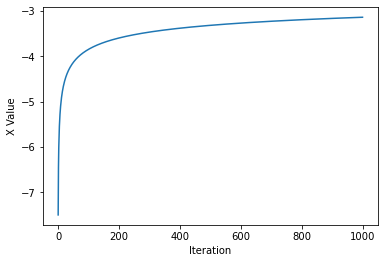

With c= 0.1 
--------------------------------------------------------------------------------------



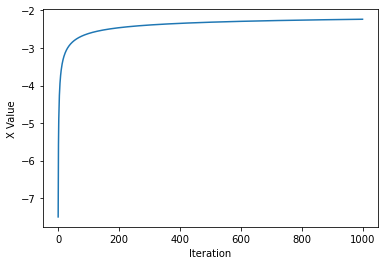

With c= 0.2 
--------------------------------------------------------------------------------------



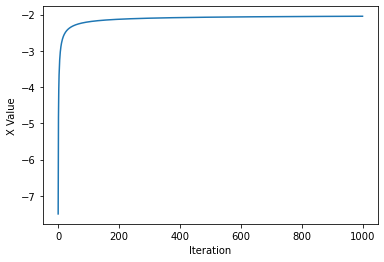

With c= 0.30000000000000004 
--------------------------------------------------------------------------------------



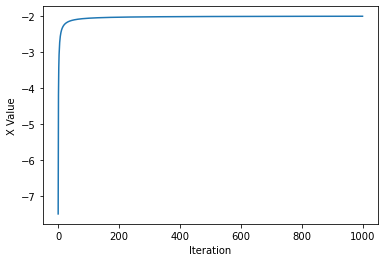

With c= 0.4 
--------------------------------------------------------------------------------------



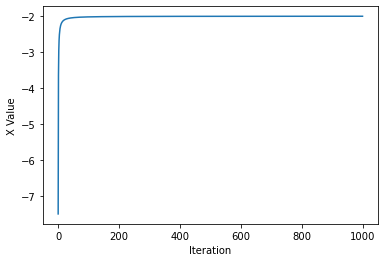

With c= 0.5 
--------------------------------------------------------------------------------------



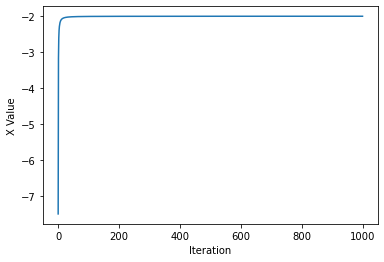

With c= 0.6000000000000001 
--------------------------------------------------------------------------------------



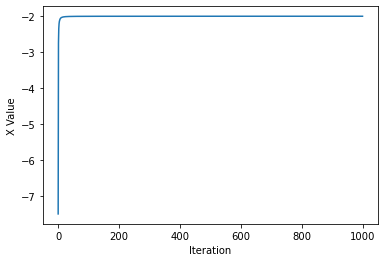

With c= 0.7000000000000001 
--------------------------------------------------------------------------------------



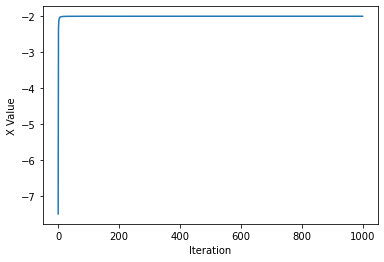

With c= 0.8 
--------------------------------------------------------------------------------------



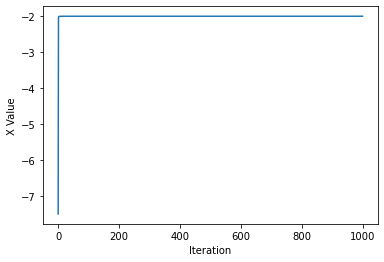

With c= 0.9 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


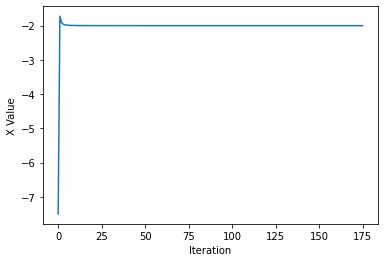

With c= 1 
--------------------------------------------------------------------------------------



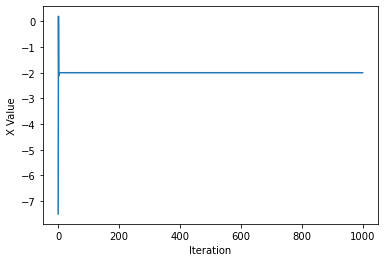

With c= 2 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


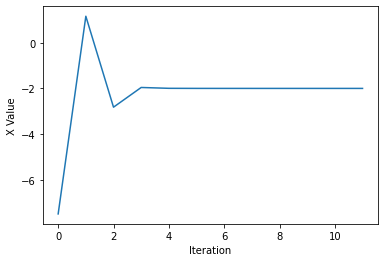

With c= 3 
--------------------------------------------------------------------------------------



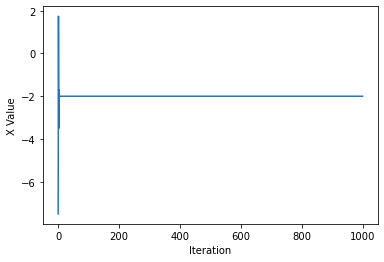

With c= 4 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


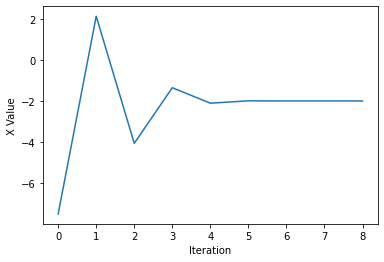

With c= 5 
--------------------------------------------------------------------------------------



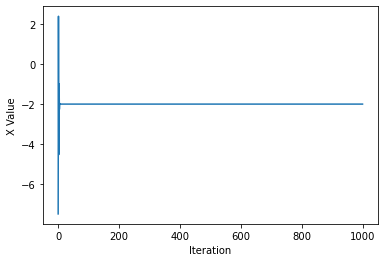

With c= 6 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


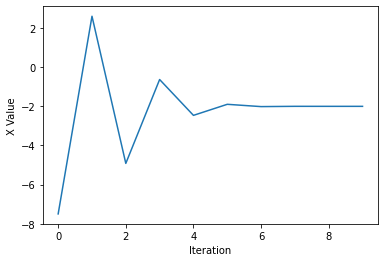

With c= 7 
--------------------------------------------------------------------------------------



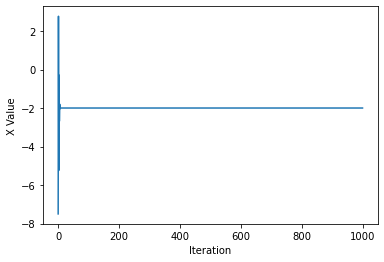

With c= 8 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


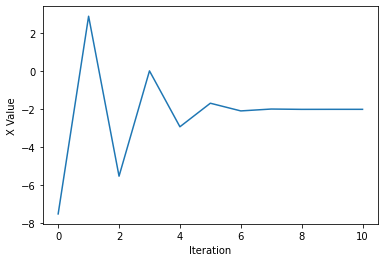

With c= 9 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


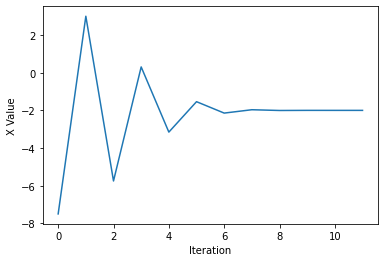

With c= 10 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


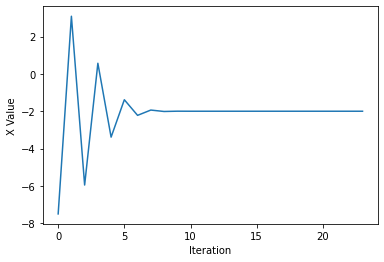

With c= 11 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


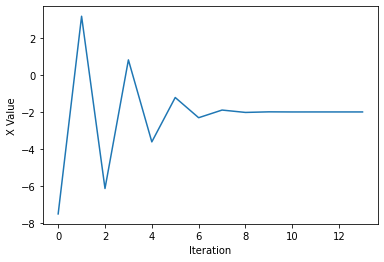

With c= 12 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


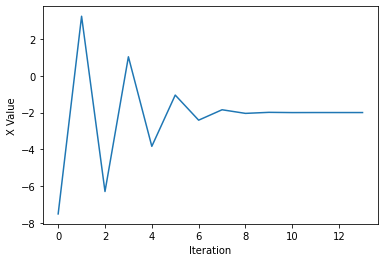

With c= 13 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


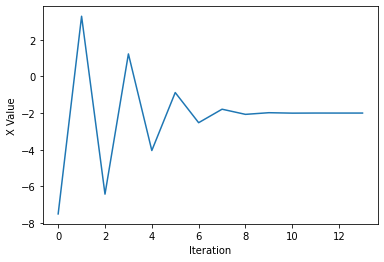

With c= 14 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


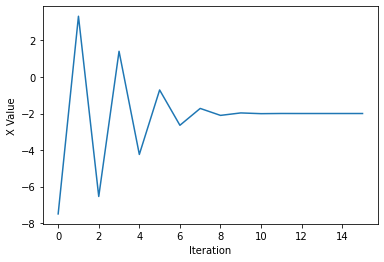

With c= 15 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


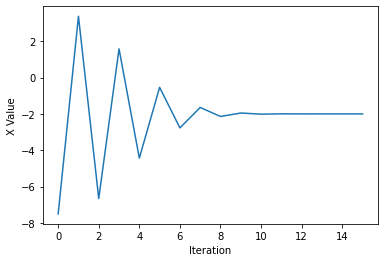

With c= 16 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


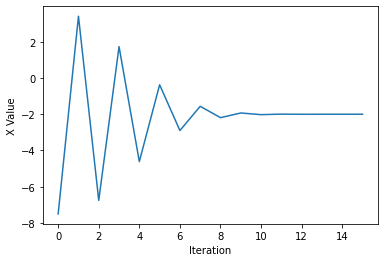

With c= 17 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


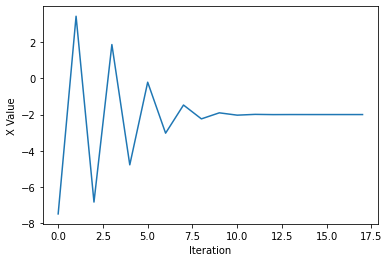

With c= 18 
--------------------------------------------------------------------------------------

Value is too small! Approximation is finish!


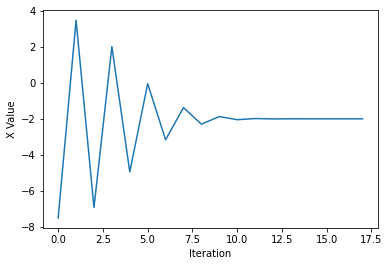

With c= 19 
--------------------------------------------------------------------------------------



In [8]:
for z in range(1, 10):
    z = z*0.1
    
    startwert = 3
    limit = 1000
    a0 = 1.05
    c = z

    result = []

    value = startwert
    for i in range(limit):
        if value >= -2 and value <= -1.99999:
            print("Value is too small! Approximation is finish!")
            break
        alpha = a0 * ((c) / (c+i))
        value = value - alpha * (2*value + 4)
        result += [value]

    plt.plot(result)
    plt.ylabel('X Value')
    plt.xlabel('Iteration')
    plt.show()
    print("With c=", z, "\n--------------------------------------------------------------------------------------\n")
    
for z in range(1,20):
    startwert = 3
    limit = 1000
    a0 = 1.05
    c = z

    result = []

    value = startwert
    for i in range(limit):
        if value >= -2 and value <= -1.99999:
            print("Value is too small! Approximation is finish!")
            break
        alpha = a0 * ((c) / (c+i))
        value = value - alpha * (2*value + 4)
        result += [value]

    plt.plot(result)
    plt.ylabel('X Value')
    plt.xlabel('Iteration')
    plt.show()
    print("With c=", z, "\n--------------------------------------------------------------------------------------\n")

1. Umso größer das c, desto weniger ändert es etwas (da es sich der 1 annähert). <br>
<br>
2. Der Test lief sehr erfolgreich. Man konnte den Unterschied, von dem abfallenden Alpha und dem statischen Alpha gut sehen und so sieht man auch, dass die Fehlsprünge noch schneller "besser" werden. Gleichzeitig kann es aber auch sein, dass man nun wieder zu kleine Schritte macht und sich der Prozess unnötig in die Länge zieht. Der Perfekte Wert für Aufgabe 5.a liegt bei 2. Der Algorithmus hat dort die "beste" Schrittgröße und passt diese dann auch noch sehr gut an (verkleinert sie im guten Maße).<br>
Und falls man keine "gute" Lernrate gewählt hat, kann man es trotzdem noch mit einem abfallenden Gewicht "retten" oder wenigstens verbessern (das zeigen die letzten Ergebnisse zu Aufgabe 5.b -> siehe c=1). Es lohnt sich hier also mit seinen Mitteln zu experimenten.

Fazit: Zum einen muss man erst einmal eine gute Schrittgröße finden, welche im besten Fall recht große Schritte macht (aber noch klein genug). Diese Übersprünge kann man dann mit einem sinkenden Gewicht für die Lernrate perfektionieren und hat dann das approximativ beste Ergebnis. Somit gilt es mit der Lernrate zu experimentieren und mit dessen abfallenden Gewicht.